In [1]:
import os
print("📂 Current Working Directory:", os.getcwd())


📂 Current Working Directory: C:\Users\Dell


In [2]:
import os
!pip install opencv-python

import cv2
import random
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:


import os

#  inner dataset folder
base_dir = r"C:\Users\Dell\Downloads\classification_dataset-20251110T082012Z-1-001\classification_dataset"

print("📂 Base Directory:", base_dir)
print("✅ Exists:", os.path.exists(base_dir))
print("📁 Contents:", os.listdir(base_dir))



📂 Base Directory: C:\Users\Dell\Downloads\classification_dataset-20251110T082012Z-1-001\classification_dataset
✅ Exists: True
📁 Contents: ['test', 'train', 'valid']


In [4]:
#Count Images per Class
import os
from collections import defaultdict

# Initialize dictionary to hold counts
image_counts = defaultdict(dict)

# Loop through each dataset split
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(base_dir, split)
    if not os.path.exists(split_path):
        continue
    
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        count = len(os.listdir(class_path))
        image_counts[split][class_name] = count

# Display results
for split, counts in image_counts.items():
    print(f"\n📁 {split.upper()} SET:")
    for cls, num in counts.items():
        print(f"  - {cls}: {num} images")



📁 TRAIN SET:
  - bird: 1414 images
  - drone: 1248 images

📁 VALID SET:
  - bird: 217 images
  - drone: 225 images

📁 TEST SET:
  - bird: 121 images
  - drone: 24 images


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


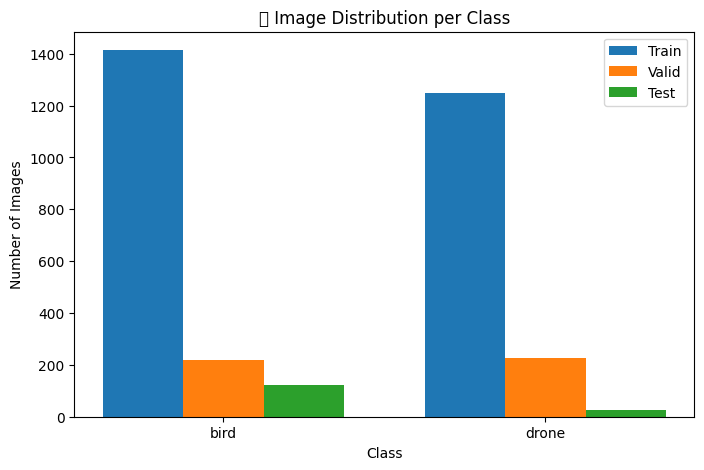

In [5]:
# check class imbalance

import matplotlib.pyplot as plt

# Combine counts from all splits
classes = ['bird', 'drone']
train_counts = [image_counts['train'].get(c, 0) for c in classes]
valid_counts = [image_counts['valid'].get(c, 0) for c in classes]
test_counts  = [image_counts['test'].get(c, 0) for c in classes]

x = range(len(classes))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar([i - width for i in x], train_counts, width=width, label='Train')
plt.bar(x, valid_counts, width=width, label='Valid')
plt.bar([i + width for i in x], test_counts, width=width, label='Test')

plt.xticks(x, classes)
plt.title("📊 Image Distribution per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.legend()
plt.show()



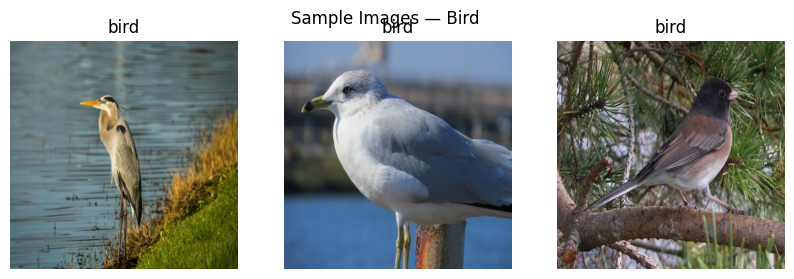

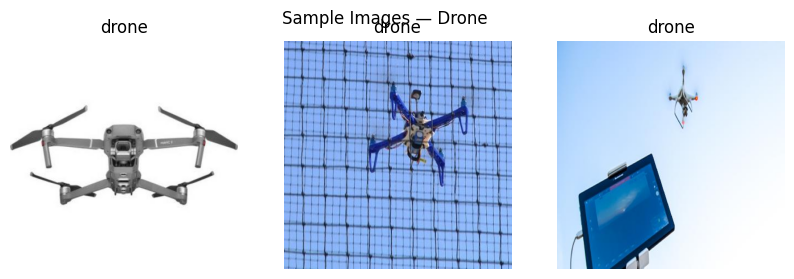

In [6]:
#Visualize Random Sample Images

import random
import matplotlib.image as mpimg

# Display random samples from train set
for class_name in classes:
    class_dir = os.path.join(base_dir, 'train', class_name)
    sample_images = random.sample(os.listdir(class_dir), 3)

    plt.figure(figsize=(10,3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.suptitle(f"Sample Images — {class_name.capitalize()}")
    plt.show()


In [7]:
# Data Preprocessing

#Import Libraries
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Pro

In [8]:


#Define Image Parameters
# Target image size for CNN models (e.g. ResNet, MobileNet)
img_height, img_width = 224, 224
batch_size = 32

#Data Generators for Preprocessing

# Image normalization (rescale pixel values)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Create dataset generators
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir  = os.path.join(base_dir, 'test')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)






Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


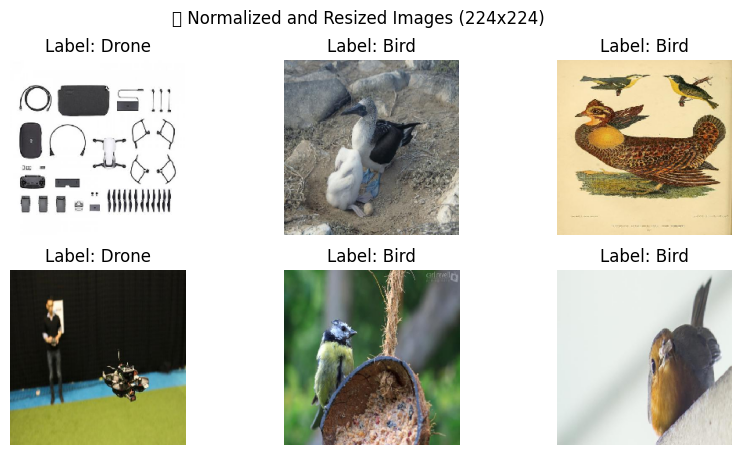

In [9]:
# Verify Sample Batch

import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels
images, labels = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {'Bird' if labels[i]==0 else 'Drone'}")
    plt.axis('off')
plt.suptitle("✅ Normalized and Resized Images (224x224)")
plt.show()


In [10]:
# Data Augementation

# Augmented ImageDataGenerator
train_augmented_datagen = ImageDataGenerator(
    rescale=1./255,           # normalize pixel values
    rotation_range=25,        # rotate images by 0–25 degrees
    width_shift_range=0.1,    # horizontal shift
    height_shift_range=0.1,   # vertical shift
    zoom_range=0.2,           # random zoom in/out
    brightness_range=[0.8, 1.2],  # vary brightness
    horizontal_flip=True,     # flip horizontally
    vertical_flip=False,      # vertical flip not needed for aerial view
    fill_mode='nearest'       # fill pixels after rotation/shifting
)


In [11]:
#Create Augmented Training Generator

train_augmented_generator = train_augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2662 images belonging to 2 classes.


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


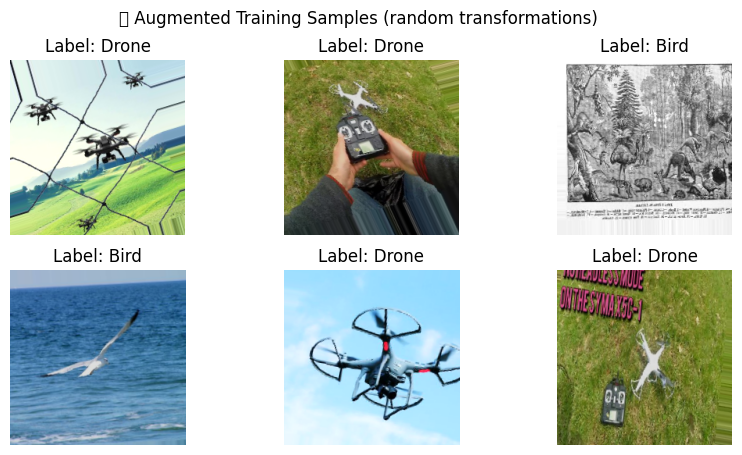

In [12]:
#Visualize Augmented Samples

# Get one batch of augmented images
aug_images, aug_labels = next(train_augmented_generator)

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(aug_images[i])
    plt.title(f"Label: {'Bird' if aug_labels[i]==0 else 'Drone'}")
    plt.axis('off')
plt.suptitle("🌀 Augmented Training Samples (random transformations)")
plt.show()


In [13]:
# Model building
# CNN Model

import tensorflow as tf
from tensorflow.keras import layers, models
# CNN architecture
def build_custom_cnn(input_shape=(224, 224, 3)):
    model = models.Sequential([
        # Convolution Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.2),

        # Convolution Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.3),

        # Convolution Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.4),

        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output Layer (binary classification)
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Build the model
custom_cnn = build_custom_cnn()
custom_cnn.summary()



C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,969 (49.36 MB)

 Trainable params: 12,939,265 (49.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [14]:
# Train Custom CNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_custom_cnn_model.h5', save_best_only=True)

# Train the model
history_cnn = custom_cnn.fit(
    train_augmented_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6152 - loss: 0.9615

84/84 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.6608 - loss: 0.7677 - val_accuracy: 0.4910 - val_loss: 1.9202
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7038 - loss: 0.6309

84/84 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7164 - loss: 0.6073 - val_accuracy: 0.4910 - val_loss: 1.1753
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7761 - loss: 0.4888 - val_accuracy: 0.4932 - val_loss: 1.3159
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7819 - loss: 0.4846

84/84 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7784 - loss: 0.4861 - val_accuracy: 0.7081 - val_loss: 0.5382
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7724 - loss: 0.4936

84/84 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7900 - loss: 0.4589 - val_accuracy: 0.7647 - val_loss: 0.4542
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8080 - loss: 0.4317 - val_accuracy: 0.7941 - val_loss: 0.4544
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.8246 - loss: 0.3878 - val_accuracy: 0.7557 - val_loss: 0.6377
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 555s 7s/step - accuracy: 0.8144 - loss: 0.4026 - val_accuracy: 0.7986 - val_loss: 0.5653
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8389 - loss: 0.3763

84/84 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8340 - loss: 0.3823 - val_accuracy: 0.8032 - val_loss: 0.4266
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8306 - loss: 0.3782

84/84 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8392 - loss: 0.3674 - val_accuracy: 0.8348 - val_loss: 0.3811
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.8122 - loss: 0.4291 - val_accuracy: 0.7195 - val_loss: 0.5566
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8182 - loss: 0.4001 - val_accuracy: 0.7896 - val_loss: 0.4906
Epoch 13/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.8445 - loss: 0.3586 - val_accuracy: 0.8190 - val_loss: 0.4213
Epoch 14/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8505 - loss: 0.3340 - val_accuracy: 0.8394 - val_loss: 0.4036
Epoch 15/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8595 - loss: 0.3194 - val_accuracy: 0.7511 - val_loss: 0.5572


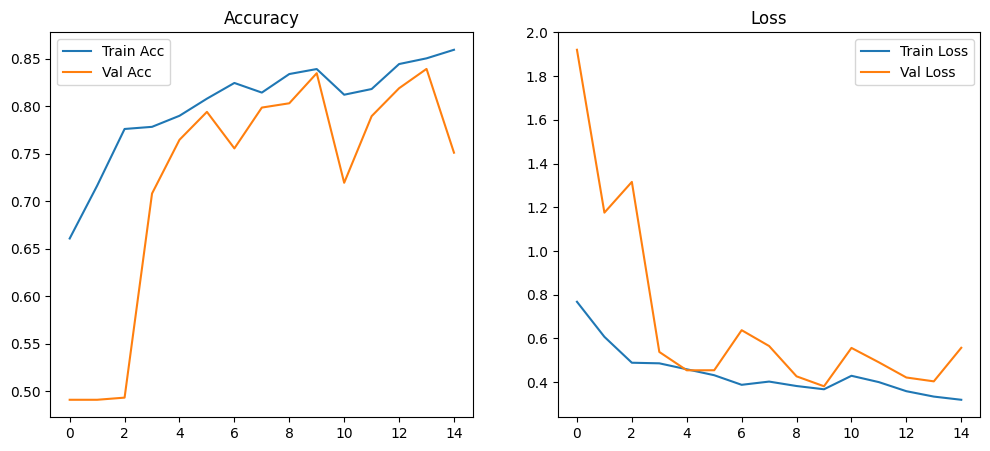

In [15]:
# Plot Accuracy and Loss

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.8759 - loss: 0.2761
 Test Accuracy: 0.8759
 Test Loss: 0.2761
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step


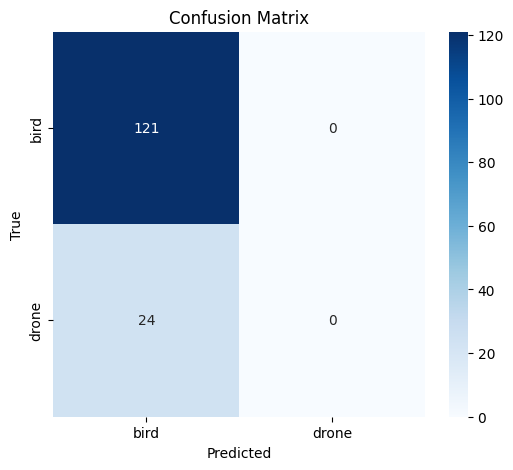

 Classification Report:
              precision    recall  f1-score   support

        bird       0.83      1.00      0.91       121
       drone       0.00      0.00      0.00        24

    accuracy                           0.83       145
   macro avg       0.42      0.50      0.45       145
weighted avg       0.70      0.83      0.76       145



C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [16]:
#model evaluation

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Evaluate model on test data
test_loss, test_acc = custom_cnn.evaluate(test_generator)
print(f" Test Accuracy: {test_acc:.4f}")
print(f" Test Loss: {test_loss:.4f}")

# Get predictions
y_pred = np.argmax(custom_cnn.predict(test_generator), axis=1)
y_true = test_generator.classes

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys()
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Classification Report ---
print(" Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [17]:
# compare
# Transfer Learning to ResNet50

import time
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -------------------------------------------------------
# Build ResNet50 base model
# -------------------------------------------------------
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers (to keep pretrained weights)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

# Build the full model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# -------------------------------------------------------
# Compile model (✅ FIXED loss function)
# -------------------------------------------------------
resnet_model.compile(
    optimizer=Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------------------------------
# Callbacks
# -------------------------------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_resnet50_model.h5', save_best_only=True)

# -------------------------------------------------------
# Train the model (with training time tracking)
# -------------------------------------------------------
start_time = time.time()

history_resnet = resnet_model.fit(
    train_augmented_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

end_time = time.time()
training_time = end_time - start_time
print(f"⏱️ Training time: {training_time/60:.2f} minutes")

# -------------------------------------------------------
# Save training history for comparison
# -------------------------------------------------------
resnet_results = {
    "Model": "ResNet50",
    "Training_Time_Min": round(training_time / 60, 2),
    "Best_Val_Acc": max(history_resnet.history['val_accuracy']),
    "Best_Train_Acc": max(history_resnet.history['accuracy'])
}

print(resnet_results)


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5177 - loss: 0.7607

84/84 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.5481 - loss: 0.7252 - val_accuracy: 0.6538 - val_loss: 0.6312
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5877 - loss: 0.6916

84/84 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.5977 - loss: 0.6799 - val_accuracy: 0.6516 - val_loss: 0.6182
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5937 - loss: 0.6624

84/84 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.6131 - loss: 0.6538 - val_accuracy: 0.6652 - val_loss: 0.6080
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6300 - loss: 0.6446

84/84 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6412 - loss: 0.6346 - val_accuracy: 0.6719 - val_loss: 0.6056
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6341 - loss: 0.6301

84/84 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6473 - loss: 0.6245 - val_accuracy: 0.6719 - val_loss: 0.5953
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6471 - loss: 0.6262

84/84 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6657 - loss: 0.6147 - val_accuracy: 0.6719 - val_loss: 0.5915
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6360 - loss: 0.6229

84/84 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.6480 - loss: 0.6165 - val_accuracy: 0.6833 - val_loss: 0.5814
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.6777 - loss: 0.6050 - val_accuracy: 0.6968 - val_loss: 0.5825
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6559 - loss: 0.6130

84/84 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6762 - loss: 0.6022 - val_accuracy: 0.7014 - val_loss: 0.5693
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6878 - loss: 0.5844

84/84 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6871 - loss: 0.5871 - val_accuracy: 0.6968 - val_loss: 0.5645
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6838 - loss: 0.5913

84/84 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6927 - loss: 0.5871 - val_accuracy: 0.7081 - val_loss: 0.5573
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.6927 - loss: 0.5833 - val_accuracy: 0.7217 - val_loss: 0.5706
Epoch 13/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.6935 - loss: 0.5785 - val_accuracy: 0.7014 - val_loss: 0.5793
Epoch 14/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.6953 - loss: 0.5789 - val_accuracy: 0.7217 - val_loss: 0.5609
Epoch 15/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6868 - loss: 0.5789

84/84 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.6920 - loss: 0.5704 - val_accuracy: 0.7330 - val_loss: 0.5393
Epoch 16/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.7032 - loss: 0.5686 - val_accuracy: 0.7036 - val_loss: 0.5417
Epoch 17/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.7089 - loss: 0.5597 - val_accuracy: 0.7308 - val_loss: 0.5467
Epoch 18/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6998 - loss: 0.5688

84/84 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7119 - loss: 0.5583 - val_accuracy: 0.7285 - val_loss: 0.5259
Epoch 19/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7098 - loss: 0.5578

84/84 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.7122 - loss: 0.5553 - val_accuracy: 0.7376 - val_loss: 0.5208
Epoch 20/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7066 - loss: 0.5581 - val_accuracy: 0.7014 - val_loss: 0.5411
⏱️ Training time: 64.85 minutes
{'Model': 'ResNet50', 'Training_Time_Min': 64.85, 'Best_Val_Acc': 0.7375565767288208, 'Best_Train_Acc': 0.7122464179992676}


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8621 - loss: 0.4662
✅ ResNet50 Test Accuracy: 0.8621
✅ ResNet50 Test Loss: 0.4662
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


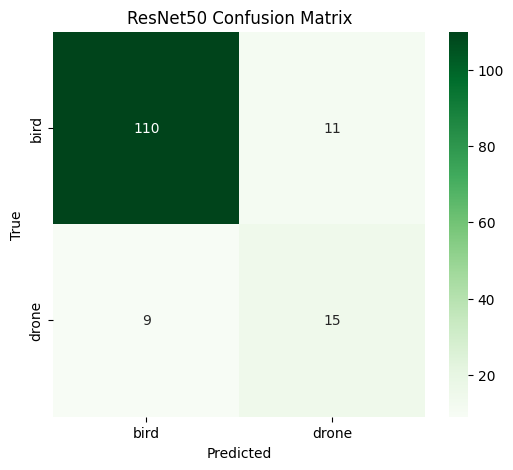

 ResNet50 Classification Report:
              precision    recall  f1-score   support

        bird       0.92      0.91      0.92       121
       drone       0.58      0.62      0.60        24

    accuracy                           0.86       145
   macro avg       0.75      0.77      0.76       145
weighted avg       0.87      0.86      0.86       145



In [18]:
# Evaluate the ResNet50 Model on Test Data
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Evaluate on test data
test_loss_resnet, test_acc_resnet = resnet_model.evaluate(test_generator)
print(f"✅ ResNet50 Test Accuracy: {test_acc_resnet:.4f}")
print(f"✅ ResNet50 Test Loss: {test_loss_resnet:.4f}")

# Predictions
y_pred_resnet = np.argmax(resnet_model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm_resnet = confusion_matrix(y_true, y_pred_resnet)
plt.figure(figsize=(6,5))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Greens',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("ResNet50 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(" ResNet50 Classification Report:")
print(classification_report(y_true, y_pred_resnet, target_names=test_generator.class_indices.keys()))


In [19]:
#Compare Both Models in One Table

import pandas as pd

cnn_results = {
    "Model": "Custom CNN",
    "Training_Time_Min": 15.0,          # replace with your time if measured
    "Best_Val_Acc": max(history_cnn.history['val_accuracy']),
    "Best_Train_Acc": max(history_cnn.history['accuracy']),
    "Test_Acc": test_acc
}

# Add ResNet50 results
resnet_results["Test_Acc"] = test_acc_resnet

# Combine into DataFrame
comparison_df = pd.DataFrame([cnn_results, resnet_results])
comparison_df


,Model,Training_Time_Min,Best_Val_Acc,Best_Train_Acc,Test_Acc
0,Custom CNN,15.00,0.839366,0.859504,0.875862
1,ResNet50,64.85,0.737557,0.712246,0.862069


In [20]:

from sklearn.metrics import classification_report
import numpy as np

# Get predictions on test set
y_pred = custom_cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(test_generator.classes, y_pred_classes, target_names=list(test_generator.class_indices.keys())))



5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step
              precision    recall  f1-score   support

        bird       0.83      1.00      0.91       121
       drone       0.00      0.00      0.00        24

    accuracy                           0.83       145
   macro avg       0.42      0.50      0.45       145
weighted avg       0.70      0.83      0.76       145



C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [21]:
model = tf.keras.models.load_model("best_custom_cnn_model.h5")

print(model.class_names if hasattr(model, "class_names") else "No class_names attribute")


No class_names attribute
